## Partial Autocorrelation Function (PACF)

PACF of an stationary series $x_t$ is the correlation of the series at two time points, say $x_s$ and $x_t$ when the linear dependence of the middle terms is removed.

### PACF of a mean-zero stationary process, $x_t$ is 
$$\phi_{1,1}=Corr(x_{t+1}, x_{t})=\rho(1)$$

and for $h\geq 2$

$$\phi_{hh}=Corr(x_{t+h}-\hat{x}_{t+h}, x_t-\hat{x}_t)$$

where $\hat{x}_{t+h}=\beta_1 x_{t+h-1}+\beta_2 x_{t+h-2}+...+\beta_{h-1} x_{t+1}$ and $\hat{x}_{t}=\beta_1 x_{t+1}+\beta_2 x_{t+2}+...+\beta_{h-1} x_{t+h-1}$ are linear regressions.

Because of stationarity, the coefficients, $\beta_1, \beta_2,...,\beta_{h-1}$ is the same in both the last two equations.

## Example: The PACF of an AR(1)

Let $x_t=\phi x_{t-1}+w_t$, with $|\phi|<1$. 

In the previous section we stated that for this model $\rho(h)=\phi^h$ for $h=1,2,..$.
Hence $\phi_{1,1}=\rho(1)=\phi$.

To calculate $\phi_{2,2}$, consider the regression $\hat{x}_{t+2}=\beta x_{t+1}$.
We should find the $\beta$ which minimizes

\begin{equation}
\begin{split}
E((x_{t+2}-\hat{x}_{t+2})^2) &= E(x^2_{t+2}-2\beta x_{t+2}x_{t+1}+\beta^2 x^2_{t+1})\\
&=E(x^2_{x+2})-2\beta E(x_{t+2} x_{t+1})+\beta^2 E(x^2_{t+1})\\
& = Var(x_{t+2})+E^2(x_{t+2})-2\beta Cov(x_{t+2}, x_{t+1})+\beta^2 Var(x_{t+1});\\ \text{note that } Cov(x_{t+2}, x_{t+1})=E((x_{t+2}-E(x_{t+2}))(x_{t+1}-E(x_{t+1})))= E(x_{t+2}x_{t+1})\\
& = \gamma(0)-2\beta \gamma(1) + \beta^2 \gamma(0) = f(\beta) \text{ say}
\end{split} 
\end{equation}







## PACF of an AR(p)


Consider $x_t=\sum_{j=1}^p\phi_j x_{t-j}$. That is $x_{t+h}=\sum_{j=1}^p\phi_j x_{t+h-j}$ and for $h>p$ the regression of $x_{t+h}$ on ${x_{t+1},...,x_{t+h-1}}$ takes the form

$$\hat{x}_{t+h}=\sum_{j=1}^p \phi_j x_{t+h-j}$$

Sor for $h>p$, $\phi_{hh}=Corr(x_{t+h}-\hat{x}_{t+h}, x_t-\hat{x}_t)=Corr(w_{t+h}, x_t-\hat{x}_t)=0$

That is PACF is zero for all $h>p$. For $h\leq p$ it is not necessarily zero.


Also it can be shown that the PACF of MA(q) is not necessarily zero (but tails off).

PACF of ARMA is also not necessarily zero (but tails off).


In summary

|| AR(p) | MA(q) | ARMA(p,q) |
| --- | --- | --- | --- |
| ACF | Tails off | Cuts off after q lags | Tails off |
| PACF | Cuts off after p lags | Tails off | Tails off |

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import rec
import seaborn as sns
sns.set_style('whitegrid')

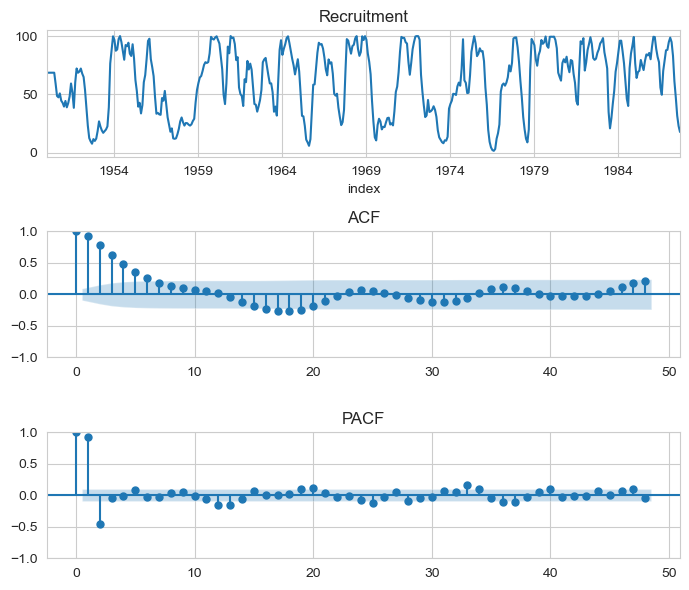

In [7]:
fig, axes = plt.subplots(nrows=3, figsize=(7, 6))
rec.plot(ax=axes[0], title="Recruitment", legend=False)
sm.graphics.tsa.plot_acf(rec, lags=48, ax = axes[1], title="ACF")
sm.graphics.tsa.plot_pacf(rec, lags=48, ax = axes[2], title="PACF")
fig.tight_layout()
plt.show()

ACF tails off and PACF cuts off at lag 2 (large values at h=1 and 2 and then is essentially zero for higher lags). Hence ACF and PACF are consistent with the behavior of an AR(2). ACF has cycles corresponding roughly to a 12 month period. 

This suggests that AR(2) model will be a good fit for this series.

The proporsed model takes the form $x_t=\phi_0+\phi_1 x_{t-1}+\phi_2 x_{t-2}+w_t$, an additional term $\phi_0$ is considered since the mean of the series is not zero.

Using data triplets $\{(x_3,x_2,x_1), (x_4,x_3,x_2), ...., (x_{453}, x_{452}, x_{451})\}$  we fit the model above.

In [21]:
df = rec.copy()
df.head()

,value
index,
1950-01,68.63
1950-02,68.63
1950-03,68.63
1950-04,68.63
1950-05,68.63


In [22]:
sh1 = df.shift(1).value
sh2 = df.shift(2).value
df["t_1"] = sh1
df["t_2"] = sh2

In [23]:
df.dropna().head()

,value,t_1,t_2
index,,,
1950-03,68.63,68.63,68.63
1950-04,68.63,68.63,68.63
1950-05,68.63,68.63,68.63
1950-06,68.63,68.63,68.63
1950-07,59.16,68.63,68.63


In [24]:
fit = ols(formula="value ~ t_1+t_2", data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1734.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          1.21e-211
Time:                        10:40:06   Log-Likelihood:                -1653.9
No. Observations:                 451   AIC:                             3314.
Df Residuals:                     448   BIC:                             3326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7371      1.114      6.046      0.0

In [33]:
(fit.resid**2).sum()/451

89.71705242266236

Estimates are $\hat{\phi}_0=6.74$, $\hat{\phi}_1=1.35$, $\hat{\phi}_2=-0.46$ and $\hat{\sigma}_w^2 = 89.72$